# Regression Notebook with PyGRN

In [ ]:
from pygrn import grns, problems, evolution, config
import argparse
import os
import numpy as np
import matplotlib.pyplot as plt
from loguru import logger



# Creation of the Regression problem
def f(t, f: float = 1, k: int = 3):
    """ Fourrier decomposition of a square signal

    Args:
        t (float): time
        f(float, optional): frequency. Defaults to 1. 
        k (int, optional): degree of decomposition. Defaults to 2.

    Returns:
        values
    """
    y = np.zeros(t.shape[0])
    for i in range(0, k):

        y += np.sin((2*i + 1) * 2*np.pi*f*t)/(2*i + 1)
    
    
    y /= (4/np.pi)
    
    # transform values between 0 and 1
    # y = (y - np.min(y)) / (np.max(y) - np.min(y))
    
    return y

def f_lin(t):

    return t

class MyRegression(problems.base.Problem):
    def __init__(self, x_train, y_train):
        super().__init__("regression")
        self.namestr = "regression"
        self.nin = 1
        self.nout = 1

        self.x_train = x_train
        self.y_train = y_train

        
    def eval(self, grn):

        grn.setup()
        grn.warmup(10)
        fit = 0.0
        for i in range(max(self.x_train.shape)):
            grn.set_input(self.x_train[i])
            grn.step()
            fit += np.linalg.norm(grn.get_output().item() - self.y_train[i]).item()

        return 1-fit


In [ ]:
t = np.linspace(-1, 1, 500)
y = f(t, f=1, k=5)
    
logger.level("INFO")
grn = lambda : grns.ClassicGRN()
problem = MyRegression(t, y)


grneat = evolution.Evolution(problem, grn)
best_fit, best_ind = grneat.run(100)

best_fit_history = grneat.best_fit_history
logger.info("best fit: ", best_fit)
# problem.eval(grneat.best_grn)
    
# y_eval = f(t_eval)
best_grn = best_ind.grn

best_grn.setup()
best_grn.warmup(25)
y_eval = []
for i in range(max(t.shape)):
    best_grn.set_input(t[i])
    best_grn.step()
    y_eval.append(best_grn.get_output().item())


plt.plot(t, y_eval, label="prediction")
plt.plot(t, y, '.', label="target")

plt.legend()
plt.figure(figsize=(10, 5))
plt.plot(best_fit_history)
plt.show()

2025-07-17 14:22:55.226 | DEBUG    | pygrn.evolution.evolution:report:46 - S,2025-07-17T14:22:55.226740,0,0,11,0.055211,-201.336251,3,0.140000,0.053318,3.000000
2025-07-17 14:22:55.227 | DEBUG    | pygrn.evolution.evolution:report:46 - S,2025-07-17T14:22:55.227451,0,1,11,0.031219,-195.992575,3,0.140000,0.035810,3.090909
2025-07-17 14:22:55.227 | DEBUG    | pygrn.evolution.evolution:report:46 - S,2025-07-17T14:22:55.227788,0,2,13,-1.138205,-210.930626,3,0.140000,0.053742,3.230769
2025-07-17 14:22:55.228 | DEBUG    | pygrn.evolution.evolution:report:46 - S,2025-07-17T14:22:55.228136,0,3,6,-0.417198,-194.180584,3,0.160000,0.066983,3.166667
2025-07-17 14:22:55.228 | DEBUG    | pygrn.evolution.evolution:report:46 - S,2025-07-17T14:22:55.228444,0,4,9,0.143839,-169.155799,3,0.160000,0.055395,3.111111
2025-07-17 14:22:55.228 | INFO     | pygrn.evolution.evolution:report:74 - Generation 0: best fit -169.15579876159964, fit mean -320.63448616295625, fit std 275.2879487326937
2025-07-17 14:22:55.

KeyboardInterrupt: 

delta =  0.40878111300405195
belta =  0.9200770037879527
[0.         0.12851044 0.35481057 0.51667899]
[0.01010101 0.11699531 0.35481699 0.5281877 ]
[0.02020202 0.1049364  0.35474217 0.54032143]
[0.03030303 0.09228038 0.35458131 0.5531383 ]
[0.04040404 0.07896746 0.35432898 0.56670356]
[0.05050505 0.06493031 0.35397893 0.58109076]
[0.06060606 0.05009286 0.35352406 0.59638308]
[0.07070707 0.03436878 0.35295621 0.61267501]
[0.08080808 0.01765969 0.35226598 0.63007434]
[0.09090909 0.         0.35139084 0.64860916]
[0.1010101  0.         0.34387732 0.65612268]
[0.11111111 0.         0.33603785 0.66396215]
[0.12121212 0.         0.32785129 0.67214871]
[0.13131313 0.         0.31929461 0.68070539]
[0.14141414 0.         0.31034271 0.68965729]
[0.15151515 0.         0.30096822 0.69903178]
[0.16161616 0.         0.29114114 0.70885886]
[0.17171717 0.         0.28082861 0.71917139]
[0.18181818 0.         0.26999453 0.73000547]
[0.19191919 0.         0.25859914 0.74140086]
[0.2020202  0.         

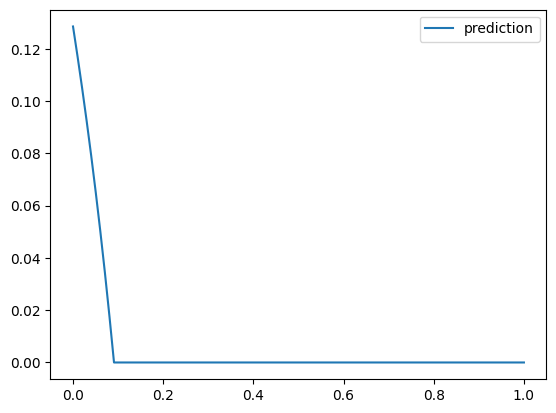

<Figure size 1000x500 with 0 Axes>

In [8]:
# test a random genome 
from pygrn import grns, problems, evolution, config
import argparse
import os
import numpy as np
import matplotlib.pyplot as plt
from loguru import logger



grn = grns.ClassicGRN()
grn.random(1, 1, 2)
t = np.linspace(0, 1, 100)

print("delta = ", grn.delta)
print("belta = ", grn.beta)
grn.setup()
grn.warmup(25)
y_eval = []
for i in range(max(t.shape)):
    grn.set_input(t[i])
    grn.step()

    print(grn.concentration)
    y_eval.append(grn.get_output().item())

plt.plot(t, y_eval, label="prediction")
# plt.plot(t, y, label="target")

plt.legend()
plt.figure(figsize=(10, 5))
# plt.plot(best_fit_history)
plt.show()